In [18]:
import pandas as pd
from sklearn import svm
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [3]:
# (a) Load the dataset.

data = pd.read_csv('toydata.csv')
data

,Feature1,Feature2,Label
0,0.559426,2.388694,0
1,1.312175,-0.717315,1
2,-1.559849,-1.924874,0
3,-2.281386,-0.136856,0
4,1.560704,-0.427958,1
...,...,...,...
95,1.804741,-0.149941,1
96,1.154661,-0.955482,1
97,-0.567725,1.389918,0
98,-1.158068,0.865620,0


In [6]:
# (b) Partition the data using the holdout method, allocating 20% of testing, and the remaining 80% for training.

X = data.drop('Label', axis = 1)
y = data['Label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("Training set shape - Features:", X_train.shape, "Target:", y_train.shape)
print("Test set shape - Features:", X_test.shape, "Target:", y_test.shape)


Training set shape - Features: (80, 2) Target: (80,)
Test set shape - Features: (20, 2) Target: (20,)


In [15]:
# (c) Construct four Support Vector Machine (SVM) models, each employing different kernel types:
# linear, poly, rbf, and sigmoid

svm_linear = svm.SVC(kernel='linear')
svm_poly = svm.SVC(kernel='poly', degree=3)  # Using a polynomial kernel of degree 3
svm_rbf = svm.SVC(kernel='rbf')
svm_sigmoid = svm.SVC(kernel='sigmoid')


svm_linear.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)
svm_sigmoid.fit(X_train, y_train)

# Make predictions
y_pred_linear = svm_linear.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)
y_pred_sigmoid = svm_sigmoid.predict(X_test)

In [16]:
# (d) Assess the models using the test data.

def print_evaluation_metrics(y_true, y_pred, model_name):
    print(f"Evaluation metrics for {model_name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print(classification_report(y_true, y_pred))

# Assess each SVM model using the test data
print_evaluation_metrics(y_test, y_pred_linear, "Linear Kernel SVM")
print_evaluation_metrics(y_test, y_pred_poly, "Polynomial Kernel SVM")
print_evaluation_metrics(y_test, y_pred_rbf, "RBF Kernel SVM")
print_evaluation_metrics(y_test, y_pred_sigmoid, "Sigmoid Kernel SVM")


Evaluation metrics for Linear Kernel SVM:
Accuracy: 0.95
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.90      1.00      0.95         9

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20

Evaluation metrics for Polynomial Kernel SVM:
Accuracy: 0.9
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       0.82      1.00      0.90         9

    accuracy                           0.90        20
   macro avg       0.91      0.91      0.90        20
weighted avg       0.92      0.90      0.90        20

Evaluation metrics for RBF Kernel SVM:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9

    accuracy

In [17]:
# (e) Calculate the accuracy of each SVM model

accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)

# Display the accuracies
print("Accuracy (Linear Kernel):", accuracy_linear)
print("Accuracy (Polynomial Kernel):", accuracy_poly)
print("Accuracy (RBF Kernel):", accuracy_rbf)
print("Accuracy (Sigmoid Kernel):", accuracy_sigmoid)

Accuracy (Linear Kernel): 0.95
Accuracy (Polynomial Kernel): 0.9
Accuracy (RBF Kernel): 1.0
Accuracy (Sigmoid Kernel): 0.95


Accuracy for SVM with SVC(kernel='linear'): 0.97


C:\Users\sharm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


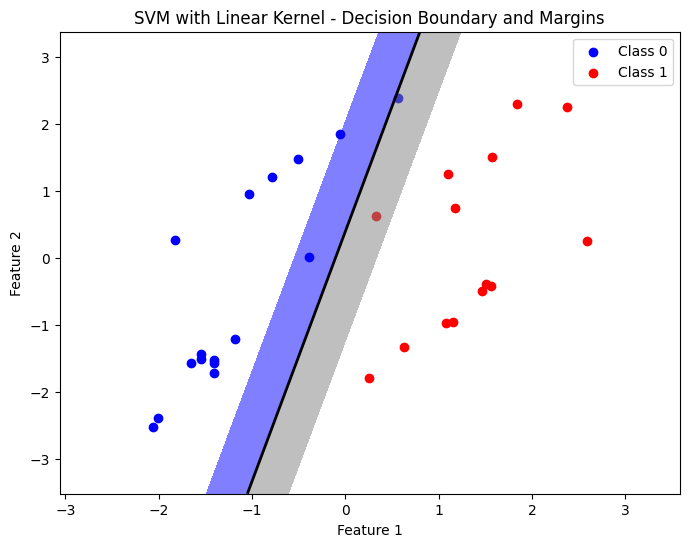

Accuracy for SVM with SVC(kernel='poly'): 0.97


C:\Users\sharm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


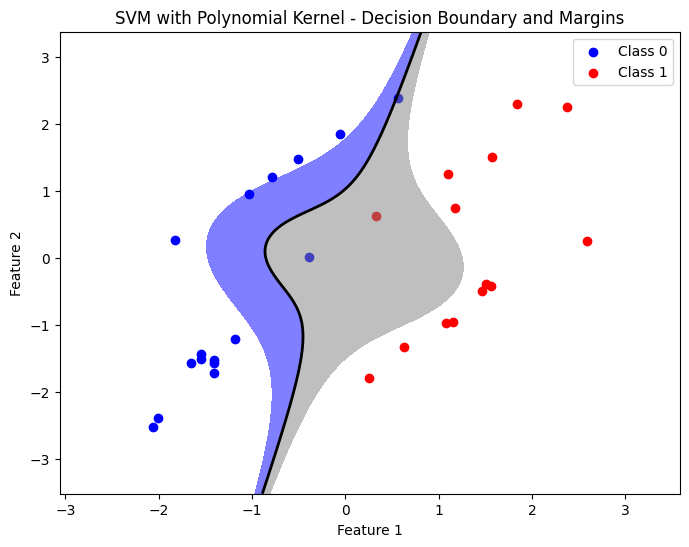

Accuracy for SVM with SVC(): 0.97


C:\Users\sharm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


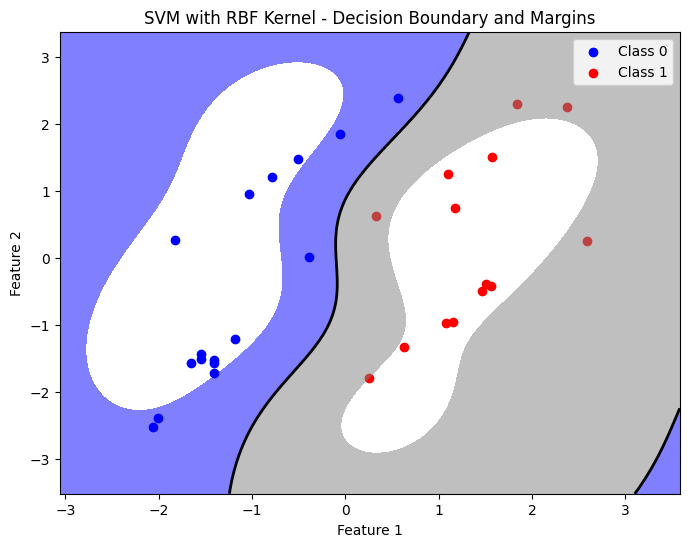

Accuracy for SVM with SVC(kernel='sigmoid'): 0.97


C:\Users\sharm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


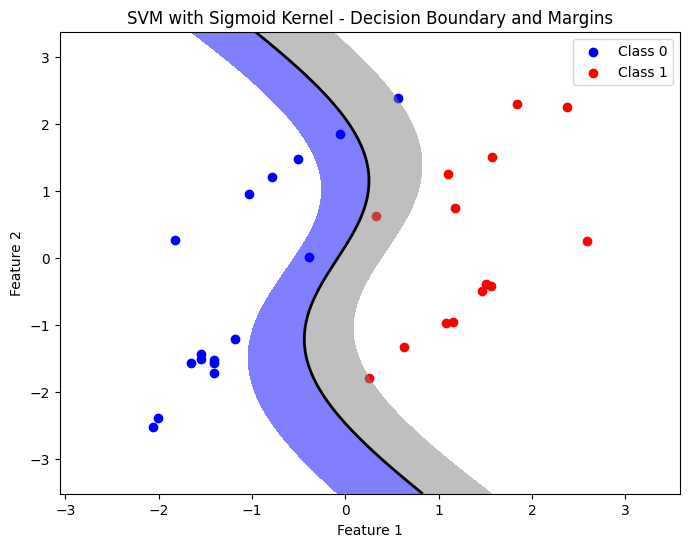

In [33]:
# Create a scatter plot function to visualize the data points and decision boundaries
def plot_contour(svm_model, X, y, title):
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for SVM with {svm_model}: {accuracy:.2f}')
    
    plt.figure(figsize=(8, 6))

    # Scatter plot for class 0
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='Class 0')

    # Scatter plot for class 1
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='Class 1')

    # Plot decision boundary and margins
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.5, colors=['blue', 'gray', 'red'])
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()
    

# Plot scatter plots with decision boundary and margins for each SVM model
plot_contour(svm_linear, X_test.values, y_test, 'SVM with Linear Kernel - Decision Boundary and Margins')
plot_contour(svm_poly, X_test.values, y_test, 'SVM with Polynomial Kernel - Decision Boundary and Margins')
plot_contour(svm_rbf, X_test.values, y_test, 'SVM with RBF Kernel - Decision Boundary and Margins')
plot_contour(svm_sigmoid, X_test.values, y_test, 'SVM with Sigmoid Kernel - Decision Boundary and Margins')
